In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import sam as rd
import os

In [2]:
f = h5py.File('C:\\Users\\samgr\\OneDrive\\Desktop\\Masters_Project\\Preparation\\ICESat2_Data\\177219966\\ATL08_20181014141223_02440101_003_01.h5', 'r')
mean_canopy = f['/gt1r/land_segments/canopy/h_mean_canopy'][:]
min_canopy = f['/gt1r/land_segments/canopy/h_min_canopy'][:]
max_canopy = f['/gt1r/land_segments/canopy/h_max_canopy'][:]
toc_roughness = f['/gt1r/land_segments/canopy/toc_roughness'][:]
canopy_openness = f['/gt1r/land_segments/canopy/canopy_openness'][:]

latitude = f['/gt1r/land_segments/latitude']
longitude = f['/gt1r/land_segments/longitude'][:]
dt = f['/gt1r/land_segments/delta_time'][:]
segment_id_beg = f['/gt1r/land_segments/segment_id_beg'][:]
segment_id_end = f['/gt1r/land_segments/segment_id_end'][:]
canopy_rh_conf =f['/gt1r/land_segments/canopy/canopy_rh_conf'][:]
ph_segment_id =f['/gt1r/signal_photons/ph_segment_id'][:]


In [3]:
df08=pd.DataFrame({'latitude':latitude,'longitude':longitude,'delta time':dt,'Segment_id_beg':segment_id_beg,'segment_id_end':segment_id_end,'mean_canopy': mean_canopy,
                   'canopy_rh_conf':canopy_rh_conf, 'canopy_openness':canopy_openness, 'min_canopy':min_canopy, 'max_canopy': max_canopy, 'toc_roughness':toc_roughness})
df08
    

,latitude,longitude,delta time,Segment_id_beg,segment_id_end,mean_canopy,canopy_rh_conf,canopy_openness,min_canopy,max_canopy,toc_roughness
0,0.000579,20.375406,2.476154e+07,1,5,1.290175e+01,1,6.285161e+00,9.770813e-01,2.740494e+01,5.744942e+00
1,0.001472,20.375317,2.476154e+07,6,10,1.045795e+01,2,7.883380e+00,7.256165e-01,2.932574e+01,1.938382e+00
2,0.002374,20.375229,2.476154e+07,11,15,1.512998e+01,1,8.756711e+00,5.876465e-01,3.073804e+01,1.482360e+00
3,0.003276,20.375141,2.476154e+07,16,20,1.444446e+01,2,7.367977e+00,7.568054e-01,2.851227e+01,1.881915e+00
4,0.004178,20.375050,2.476154e+07,21,25,1.343893e+01,2,7.095978e+00,7.490234e-01,2.765768e+01,1.464491e+00
...,...,...,...,...,...,...,...,...,...,...,...
20615,26.995687,17.592564,2.476197e+07,149677,149681,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38
20616,26.996588,17.592468,2.476197e+07,149682,149686,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38
20617,26.997490,17.592373,2.476197e+07,149687,149691,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38
20618,26.998390,17.592272,2.476197e+07,149692,149696,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38


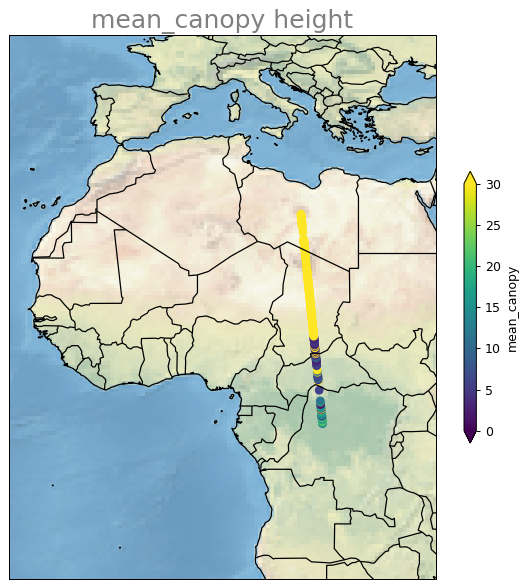

In [4]:
variable = 'mean_canopy' #what we want the colour to represent


## variable min and max (I could probably make this automatic) 
vmin=0
vmax=30
ticks=np.arange(-20,100,5)

#size of image
plt.figure(figsize=(8,8), dpi= 90)

#coordinates / projection
ax = plt.axes(projection=crs.PlateCarree())
lat1, lon1, lat2, lon2 = -20, 35, -20, 50
ax.set_extent([lat1, lon1, lat2, lon2], crs=crs.PlateCarree())

#background and design
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.set_title('{} height'.format(variable), fontsize = 20, color = 'gray')

#adding variable onto map (and colour bar)
plt.scatter(df08['longitude'][::100], df08['latitude'][::100],c=df08[variable][::100], cmap='viridis', vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree())
plt.colorbar(label=variable, shrink=0.5, ticks=ticks,extend='both')

*** ALL DATA THAT IS BLOCKED BY CLOUD OR IS EMPTY IS FILLED BY 3.402 X 10(28). THIS ACCOUNTS FOR N SAHARA YELLOW. MUST EXCLUDE FROM SURVEY. ***

In [12]:
# Filter out all rows for which the mean canopy height is higher than 1000m
df08.drop(df08[df08['mean_canopy'] > 1000].index, inplace = True) 

mean_canopy_min = df08["mean_canopy"].min()
mean_canopy_max = df08["mean_canopy"].max()

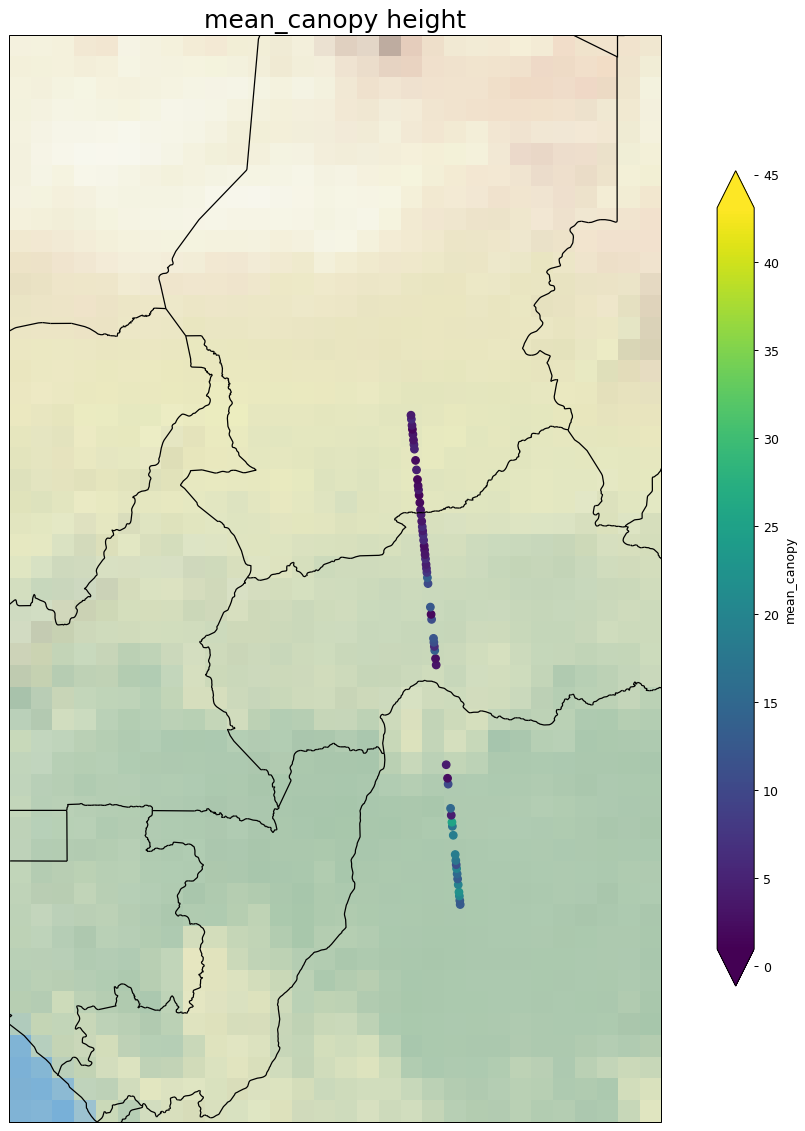

In [13]:
variable = 'mean_canopy' #what we want the colour to represent


## variable min and max (I've made this automatic - but may look better to round it up/ down) 
vmin= mean_canopy_min
vmax= mean_canopy_max
ticks=np.arange(-20,100,5)

#size of image
plt.figure(figsize=(16,16), dpi= 90)

#coordinates / projection
ax = plt.axes(projection=crs.PlateCarree())
lat1, lon1, lat2, lon2 = 10, 25, -5, 20
ax.set_extent([lat1, lon1, lat2, lon2], crs=crs.PlateCarree())

#background and design
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.set_title('{} height'.format(variable), fontsize = 20, color = 'black')

#adding variable onto map (and colour bar)
plt.scatter(df08['longitude'][::100], df08['latitude'][::100],c=df08[variable][::100], cmap='viridis', vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree())
plt.colorbar(label=variable, shrink=0.75, ticks=ticks,extend='both')
plt.savefig("C:\\Users\\samgr\\OneDrive\\Desktop\\mean_canopy.png")

In [7]:
df08["mean_segment_id"] = df08["segment_id_end"] - df08["Segment_id_beg"]

In [8]:
df08["CV"] = df08["canopy_openness"] / df08["mean_canopy"]
df08["sd_ratio"] = df08["toc_roughness"] / df08["canopy_openness"]
df08["canopy_relief"] = (df08["mean_canopy"] - df08["min_canopy"]) / (df08["max_canopy"] - df08["min_canopy"])
df08.head(20)

,latitude,longitude,delta time,Segment_id_beg,segment_id_end,mean_canopy,canopy_rh_conf,canopy_openness,min_canopy,max_canopy,toc_roughness,mean_segment_id,CV,sd_ratio,canopy_relief
0,0.000579,20.375406,2.476154e+07,1,5,12.901748,1,6.285161,0.977081,27.404938,5.744942,4,0.487156,0.914048,0.451216
1,0.001472,20.375317,2.476154e+07,6,10,10.457947,2,7.883380,0.725616,29.325745,1.938382,4,0.753817,0.245882,0.340290
2,0.002374,20.375229,2.476154e+07,11,15,15.129979,1,8.756711,0.587646,30.738037,1.482360,4,0.578766,0.169283,0.482327
3,0.003276,20.375141,2.476154e+07,16,20,14.444464,2,7.367977,0.756805,28.512268,1.881915,4,0.510090,0.255418,0.493152
4,0.004178,20.375050,2.476154e+07,21,25,13.438931,2,7.095978,0.749023,27.657684,1.464491,4,0.528017,0.206383,0.471592
5,0.005080,20.374956,2.476154e+07,26,30,15.227290,2,7.047546,1.030823,28.632782,1.809498,4,0.462823,0.256756,0.514328
6,0.005982,20.374868,2.476154e+07,31,35,16.709995,2,7.981655,1.103485,31.335052,2.031965,4,0.477657,0.254579,0.516232
7,0.006884,20.374777,2.476154e+07,36,40,14.441039,2,8.788621,0.536804,35.148468,1.875843,4,0.608586,0.213440,0.401721
8,0.007786,20.374685,2.476154e+07,41,45,17.145208,1,6.599164,1.924377,31.408997,3.828885,4,0.384898,0.580208,0.516230
9,0.008689,20.374596,2.476154e+07,46,50,13.244272,2,7.898649,0.614075,29.401733,2.323474,4,0.596382,0.294161,0.438737


Note: Mean canopy height is just an example and we can change this as required

*** Next, we want to overlay burned area data/ Vegetation Indices ***

I am still struggling with this, as seen in my other notebook! 